In [1]:
## Import The Libarary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
## Import The Data

In [4]:
Us_accident_data = pd.read_csv('US_Accidents_Dec21_updated.csv')

In [5]:
## Checking the First Five Rows

In [6]:
Us_accident_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
## Seeking Dataset

In [8]:
Us_accident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [9]:
## Updating The Col Data Type of Start_Time, End_Time

In [10]:
## Adding Some Feactures Year, Month, Day, Hours

In [11]:
import datetime

In [12]:
Us_accident_data['Start_Time'] = pd.to_datetime(Us_accident_data['Start_Time'])
Us_accident_data['End_Time'] = pd.to_datetime(Us_accident_data['End_Time'])
Us_accident_data['Year'] = Us_accident_data['Start_Time'].dt.year
Us_accident_data['Month'] = Us_accident_data['Start_Time'].dt.month
Us_accident_data['Day'] = Us_accident_data['Start_Time'].dt.day
Us_accident_data['Time'] = Us_accident_data['Start_Time'].dt.hour

In [13]:
## Describe The Numerical Columns

In [14]:
Us_accident_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,2845342.0,2.137572,0.478722,1.000000,2.000000,2.000000,2.000000,4.000000e+00
Start_Lat,2845342.0,36.245201,5.363797,24.566027,33.445174,36.098609,40.160243,4.900058e+01
Start_Lng,2845342.0,-97.114633,18.317819,-124.548074,-118.033113,-92.418076,-80.372431,-6.711317e+01
End_Lat,2845342.0,36.245321,5.363873,24.566013,33.446278,36.097987,40.161049,4.907500e+01
End_Lng,2845342.0,-97.114387,18.317632,-124.545748,-118.033331,-92.417718,-80.373383,-6.710924e+01
Distance(mi),2845342.0,0.702678,1.560361,0.000000,0.052000,0.244000,0.764000,1.551860e+02
Number,1101431.0,8089.408114,18360.093995,0.000000,1270.000000,4007.000000,9567.000000,9.999997e+06
Temperature(F),2776068.0,61.793556,18.622629,-89.000000,50.000000,64.000000,76.000000,1.960000e+02
Wind_Chill(F),2375699.0,59.658231,21.160967,-89.000000,46.000000,63.000000,76.000000,1.960000e+02
Humidity(%),2772250.0,64.365452,22.874568,1.000000,48.000000,67.000000,83.000000,1.000000e+02


**Insight:**<br>

1. We Have Accidents Data From 2016 - 2021.
2. Mean of Severity is **2.13** Which Indicates That People Are In 2nd Category.
      -- Severity reprsents the injury scale.
3. Mostly People, Accidents Case Peoples Are Fall Down At Accidents Point.
4. At Temerature Rate **62F**,    50 Percent Of Accidents Observe.
5. At Visibility Scale Of **9**,  75 Percent of Accidents Observe.

In [15]:
## Describe The categorical Col

In [16]:
Us_accident_data.describe(include='object').T

,count,unique,top,freq
ID,2845342,2845342,A-1,1
Description,2845342,1174563,A crash has occurred causing no to minimum del...,7978
Street,2845340,159651,I-95 N,39853
Side,2845342,3,R,2353309
City,2845205,11681,Miami,106966
County,2845342,1707,Los Angeles,234122
State,2845342,49,CA,795868
Zipcode,2844023,363085,91761,6162
Country,2845342,1,US,2845342
Timezone,2841683,4,US/Eastern,1221927


In [17]:
## Categorical Col and Numerical Cols

In [18]:
cat_cols = Us_accident_data.select_dtypes(include='object').columns
num_cols = Us_accident_data.select_dtypes(include=np.number).columns
bool_cols = Us_accident_data.select_dtypes(include='bool').columns

In [19]:
cat_cols

Index(['ID', 'Description', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [20]:
num_cols

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

In [21]:
bool_cols

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [22]:
## Checking Missing Data

In [23]:
miss_value = Us_accident_data.isnull().sum().sort_values(ascending=False)
percentage = round((miss_value/len(Us_accident_data))*100,2)
pd.concat([miss_value,percentage],axis=1,keys=['Values','Percentage'])

,Values,Percentage
Number,1743911,61.29
Precipitation(in),549458,19.31
Wind_Chill(F),469643,16.51
Wind_Speed(mph),157944,5.55
Wind_Direction,73775,2.59
Humidity(%),73092,2.57
Weather_Condition,70636,2.48
Visibility(mi),70546,2.48
Temperature(F),69274,2.43
Pressure(in),59200,2.08


In [24]:
## Plot The Missing Data Percentage

<AxesSubplot:>

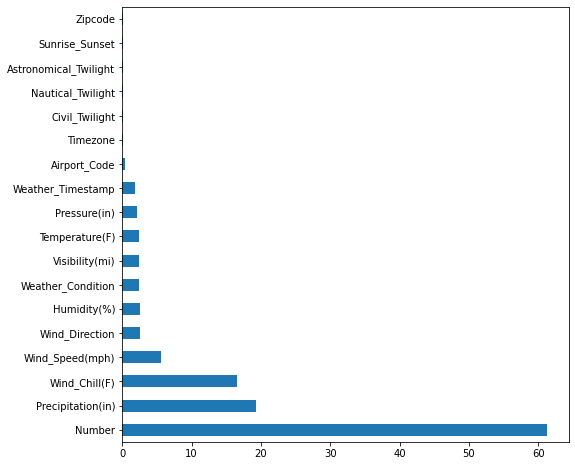

In [25]:
percentage[percentage!=0].plot(kind='barh',figsize=(8,8))

In [26]:
Us_accident_data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

In [27]:
## Select Out Some specific Cols

In [28]:
Us_Accident_Data = Us_accident_data[['Severity','Timezone','Side','City','State','County','Visibility(mi)'
                                    ,'Weather_Condition','Sunrise_Sunset','Year','Month','Day','Time']]

In [29]:
for col in Us_Accident_Data.columns:
    print(col,'--','Unique Values Are:',Us_Accident_Data[col].nunique())
    print(Us_Accident_Data[col].value_counts().sort_values(ascending=False))
    print('-'*50)

Severity -- Unique Values Are: 4
2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64
--------------------------------------------------
Timezone -- Unique Values Are: 4
US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: Timezone, dtype: int64
--------------------------------------------------
Side -- Unique Values Are: 3
R    2353309
L     492032
N          1
Name: Side, dtype: int64
--------------------------------------------------
City -- Unique Values Are: 11681
Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
De Graff                             1
Township 9                           1
Elida                                1
Old Tappan                           1
American Fork-Pleasant Grove         1
Name: City, Length: 1168

In [30]:
## Avg Severity "STATE, TIMEZONE, SIDE, WEATHER-CONDITION, SUNRISE-SUNSET" Wise

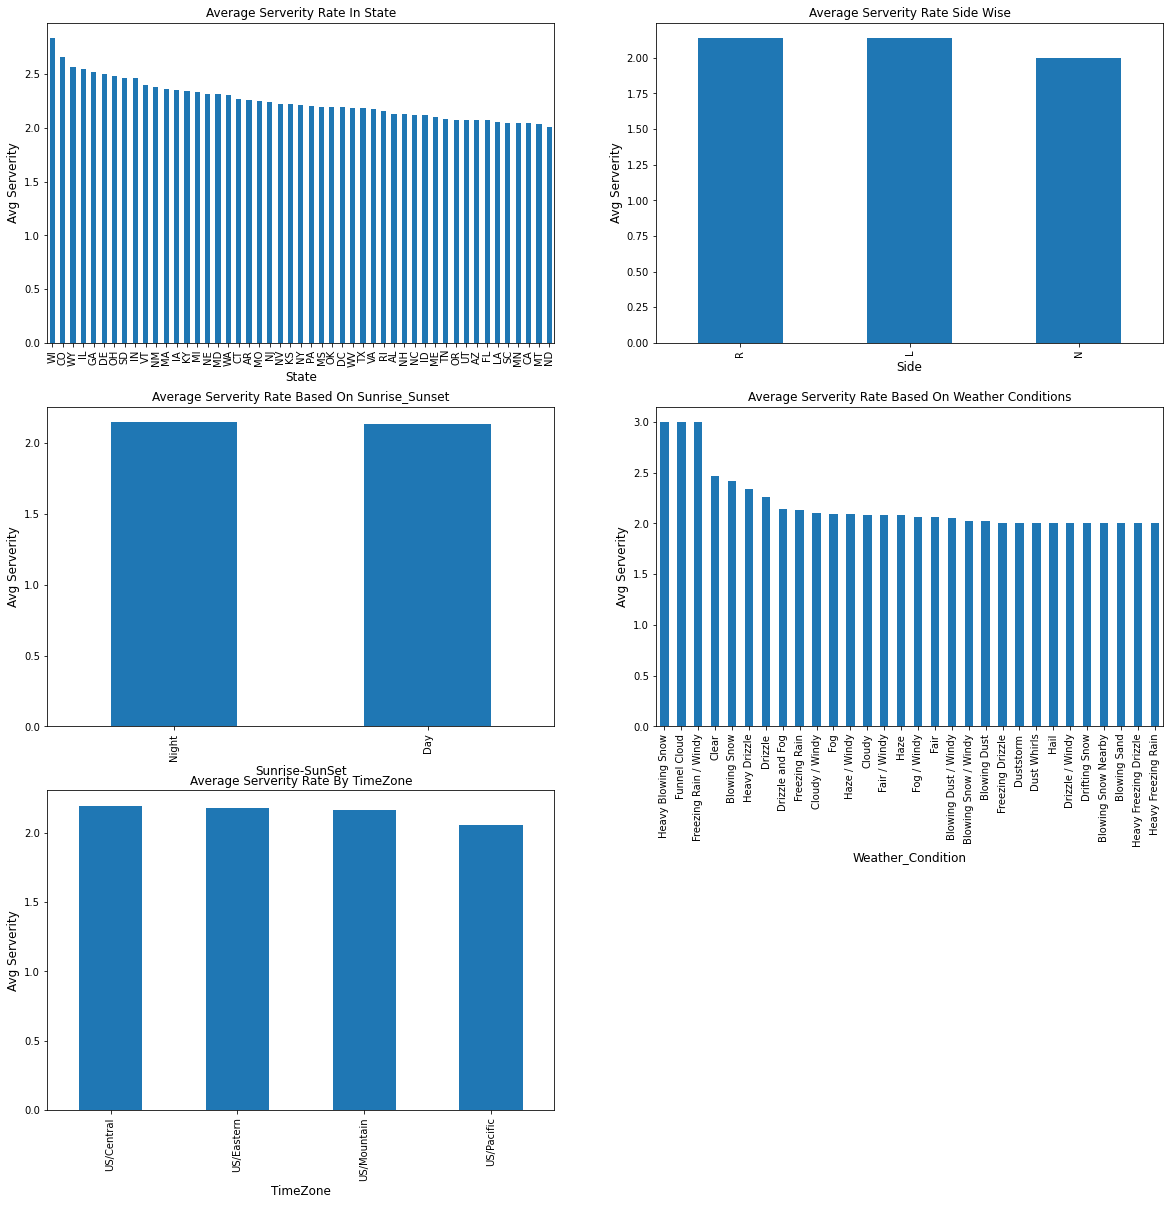

In [31]:
plt.subplot(3,2,1)
Us_Accident_Data.groupby(['State'])['Severity'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,20))
plt.xlabel('State',fontsize=12)
plt.ylabel('Avg Serverity',fontsize=12)
plt.title('Average Serverity Rate In State',fontsize=12)

plt.subplot(3,2,5)
Us_Accident_Data.groupby(['Timezone'])['Severity'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,20))
plt.xlabel('TimeZone',fontsize=12)
plt.ylabel('Avg Serverity',fontsize=12)
plt.title('Average Serverity Rate By TimeZone',fontsize=12)

plt.subplot(3,2,2)
Us_Accident_Data.groupby(['Side'])['Severity'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,20))
plt.xlabel('Side',fontsize=12)
plt.ylabel('Avg Serverity',fontsize=12)
plt.title('Average Serverity Rate Side Wise',fontsize=12)

plt.subplot(3,2,4)
Us_Accident_Data.groupby(['Weather_Condition'])['Severity'].mean().head(30).sort_values(ascending=False).plot(kind='bar',figsize=(20,20))
plt.xlabel('Weather_Condition',fontsize=12)
plt.ylabel('Avg Serverity',fontsize=12)
plt.title('Average Serverity Rate Based On Weather Conditions',fontsize=12)

plt.subplot(3,2,3)
Us_Accident_Data.groupby(['Sunrise_Sunset'])['Severity'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(20,20))
plt.xlabel('Sunrise-SunSet',fontsize=12)
plt.ylabel('Avg Serverity',fontsize=12)
plt.title('Average Serverity Rate Based On Sunrise_Sunset',fontsize=12)

plt.show()

**INSIGHT:**<br>

1. All State Have Avg Severity Rate Greater Than **2**. And State **WI** Have Highest Rate Among All.
2. Avg Severity Rate For Both Side Equal. Where Side Are left And Right.
3. Avg Severity Rate For Night And Day Equals.
4. Avg Severity Rate Is Higher In Case Of Weather Condition ('Heavy Blowing Snow, Funnel Cloud, freezing            Rain/Windly') Observe is **3**.
5. TimeZone US/Pacific Have Less Severity Rate Rather Than Others.

In [32]:
## TimeZone

<AxesSubplot:ylabel='Timezone'>

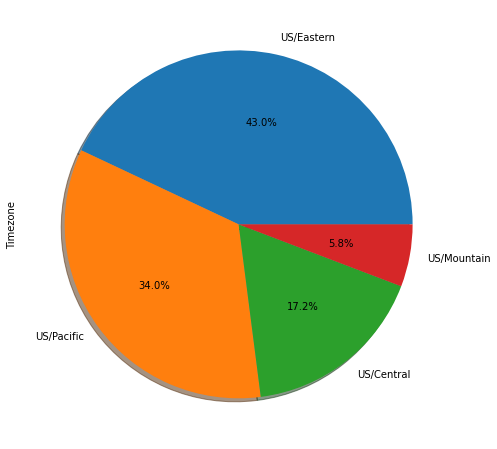

In [33]:
Us_Accident_Data['Timezone'].value_counts().head(10).plot(kind='pie',figsize=(15,8),autopct='%1.1f%%',
                   shadow=True, startangle=0)

**Insight:**<br>

1. **43%** Accidents Are Reported In US/Eastern Timezone.
2. **34%** Accidents Are Reported In US/Pacific Timezone.

**Conclusion:** <br>

Mostly Accidents Are Reports In Two TimeZone Which Is **78%**.

In [34]:
## Side

<AxesSubplot:ylabel='Side'>

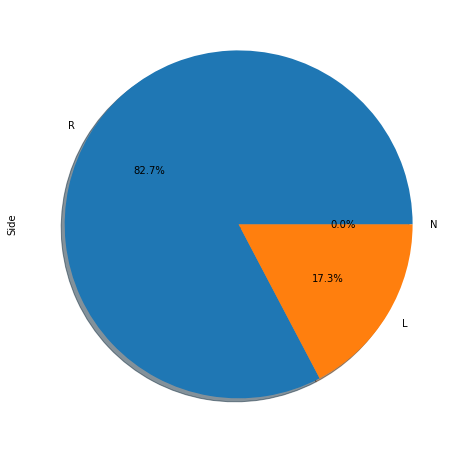

In [35]:
Us_Accident_Data['Side'].value_counts().head(10).plot(kind='pie',figsize=(15,8),autopct='%1.1f%%',
                   shadow=True, startangle=0)

**Insight:**<br>
About **83%** Accidents are happen on Right Side.

In [36]:
## Top 10 City Of Accidents

<AxesSubplot:>

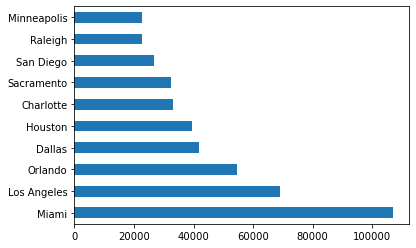

In [37]:
Us_Accident_Data['City'].value_counts().head(10).plot(kind='barh')

In [38]:
((Us_Accident_Data['City'].value_counts()/len(Us_Accident_Data))*100).head(10)

Miami          3.759337
Los Angeles    2.423470
Orlando        1.922124
Dallas         1.475359
Houston        1.386406
Charlotte      1.165132
Sacramento     1.144291
San Diego      0.935810
Raleigh        0.802715
Minneapolis    0.800185
Name: City, dtype: float64

**Insight:**<br>
         1. **4%** is higher accident rate in **Miami** city followed by Los Angeles, Orlando, Dalla, Houston.

In [39]:
## Top 10 State of Accidents

<AxesSubplot:>

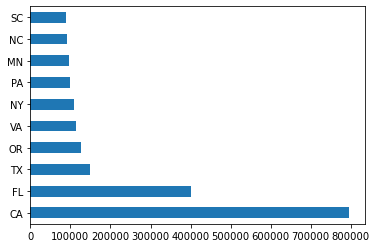

In [40]:
Us_Accident_Data['State'].value_counts().head(10).plot(kind='barh')

In [41]:
((Us_Accident_Data['State'].value_counts()/len(Us_Accident_Data))*100).head(10)

CA    27.970908
FL    14.106846
TX     5.237929
OR     4.440275
VA     3.990206
NY     3.797399
PA     3.513637
MN     3.415582
NC     3.210932
SC     3.135511
Name: State, dtype: float64

**Insight:**<br>
1. **28%** is higher rate of accident which are in **CA** State followed by FL,TX,OR,VA.

In [42]:
## Top 10 County

<AxesSubplot:>

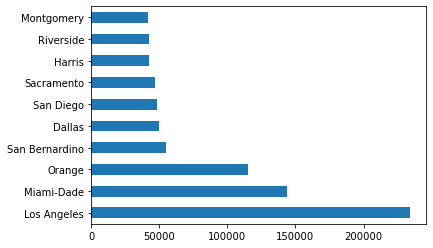

In [43]:
Us_Accident_Data['County'].value_counts().head(10).plot(kind='barh')

In [44]:
((Us_Accident_Data['County'].value_counts()/len(Us_Accident_Data))*100).head(10)

Los Angeles       8.228255
Miami-Dade        5.058759
Orange            4.038776
San Bernardino    1.933616
Dallas            1.759015
San Diego         1.699831
Sacramento        1.641560
Harris            1.495743
Riverside         1.482282
Montgomery        1.457681
Name: County, dtype: float64

**Insight**:<br>
1. About **8%** Accidents County in Los Angeles.

In [45]:
## Distribution Of Data - Accidents In City

<AxesSubplot:xlabel='City', ylabel='Density'>

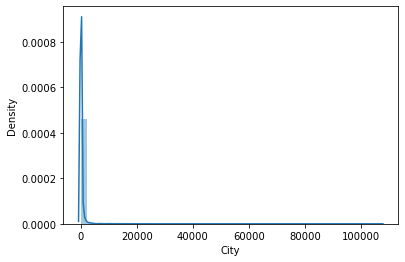

In [46]:
sns.distplot(Us_Accident_Data['City'].value_counts())

**Insight:**<br>
1. Here we can see mostly data lie between 0 - 5000. Means Most Of The City Have Less Number Of Acciedents.

In [47]:
## Time Period

<AxesSubplot:xlabel='Time', ylabel='Count'>

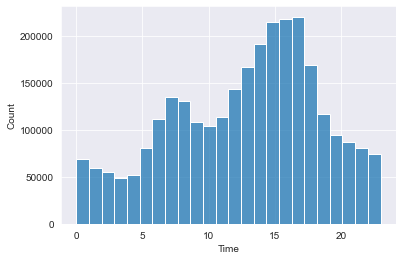

In [48]:
sns.set_style('darkgrid')
sns.histplot(Us_Accident_Data['Time'], bins = 24)

**Insight**<br>
1. A High Percentage of Accidents Occurs Between 10AM to 5PM. Which Have Exponetial Growth.

<AxesSubplot:xlabel='Day', ylabel='Count'>

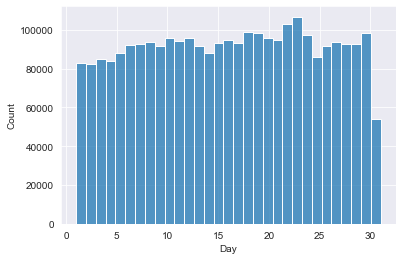

In [49]:
sns.histplot(Us_Accident_Data['Day'], bins = 31)

**Insight**<br>
1. Each Day Have Reporting Numerous Number Of Accidents.

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

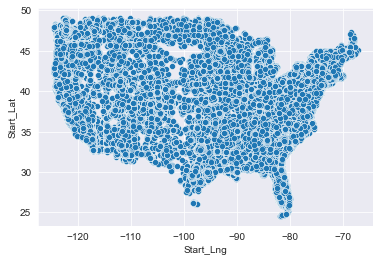

In [50]:
sns.scatterplot(x=Us_accident_data['Start_Lng'],y=Us_accident_data['Start_Lat'])

In [51]:
## Year Wise Total Number Of Accidents

In [52]:
Us_Accident_Data['Year'].value_counts()

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Year, dtype: int64

<AxesSubplot:>

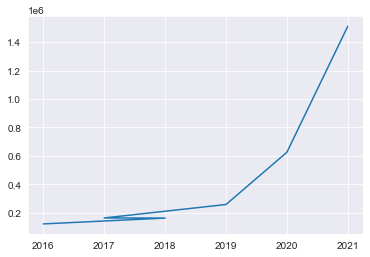

In [53]:
(Us_Accident_Data['Year'].value_counts()).plot()

**Insight:** <br>
1. Number of Accidents are increas simuntaneously with time.
2. In year __2021__ Number of Accidents are highly increase.

In [54]:
## Month Wise Total Accidents

In [55]:
Us_Accident_Data['Month'].value_counts()

12    473943
11    360696
10    299131
9     241822
6     226561
1     198365
2     194995
5     181944
8     178670
4     171880
7     159111
3     158224
Name: Month, dtype: int64

<AxesSubplot:>

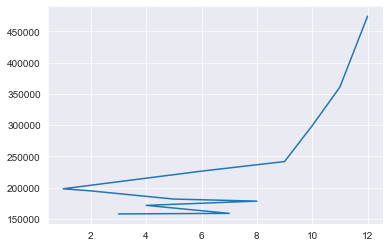

In [56]:
(Us_Accident_Data['Month'].value_counts()).plot()

**Insight:**<br>
1. In month Oct,Nov,Dec Number of Accidents Are High Respective to other months. 

In [57]:
## Year Wise From 2016 - 2021

<AxesSubplot:title={'center':'State Wise Accidents Of Year 2021'}, xlabel='State'>

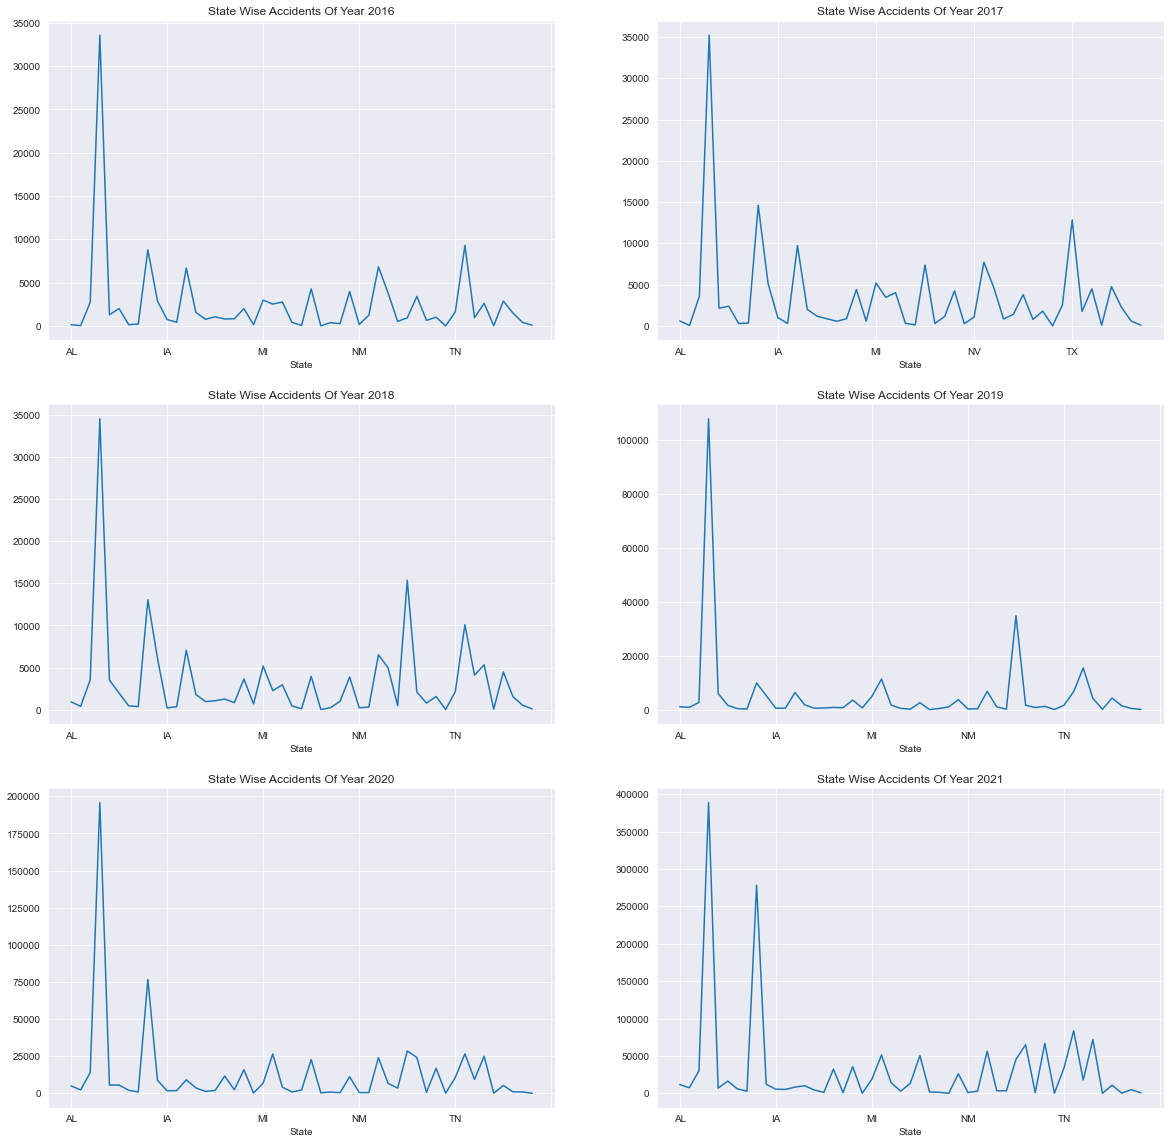

In [58]:
plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
Us_Accident_Data.groupby(['Year','State'])['Year'].count().loc[2016].plot(title='State Wise Accidents Of Year 2016')
plt.subplot(3,2,2)
Us_Accident_Data.groupby(['Year','State'])['Year'].count().loc[2017].plot(title='State Wise Accidents Of Year 2017')
plt.subplot(3,2,3)
Us_Accident_Data.groupby(['Year','State'])['Year'].count().loc[2018].plot(title='State Wise Accidents Of Year 2018')
plt.subplot(3,2,4)
Us_Accident_Data.groupby(['Year','State'])['Year'].count().loc[2019].plot(title='State Wise Accidents Of Year 2019')
plt.subplot(3,2,5)
Us_Accident_Data.groupby(['Year','State'])['Year'].count().loc[2020].plot(title='State Wise Accidents Of Year 2020')
plt.subplot(3,2,6)
Us_Accident_Data.groupby(['Year','State'])['Year'].count().loc[2021].plot(title='State Wise Accidents Of Year 2021')


**Insight:**<br>
Over The Period In State **IA** There Are Major Chage IN Accidents Rate.

In [59]:
## Check On Basis On Weathe Condition

In [60]:
Us_Accident_Data['Weather_Condition'].value_counts()

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

**Insight:**<br>
Mostly Weather Condition Is Fair And Cloudy.

<AxesSubplot:>

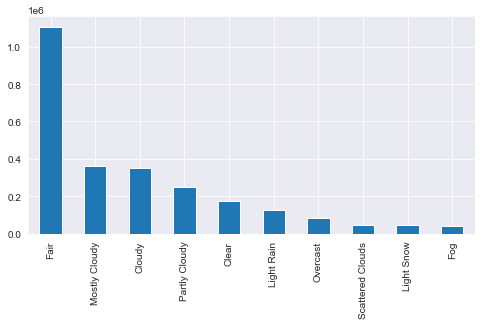

In [61]:
plt.figure(figsize=(8,4))
Us_Accident_Data['Weather_Condition'].value_counts().head(10).plot(kind='bar')

In [62]:
Us_Accident_Data.groupby(['Weather_Condition','Year'])['Year'].count()

Weather_Condition     Year
Blowing Dust          2016       1
                      2019      32
                      2020      41
                      2021      68
Blowing Dust / Windy  2016       1
                              ... 
Wintry Mix            2021    2819
Wintry Mix / Windy    2017       1
                      2019       2
                      2020      23
                      2021      48
Name: Year, Length: 439, dtype: int64

In [63]:
## Check Basis On Sunrise_Sunset

In [64]:
Us_Accident_Data['Sunrise_Sunset'].value_counts()

Day      1811935
Night    1030540
Name: Sunrise_Sunset, dtype: int64

<AxesSubplot:ylabel='Sunrise_Sunset'>

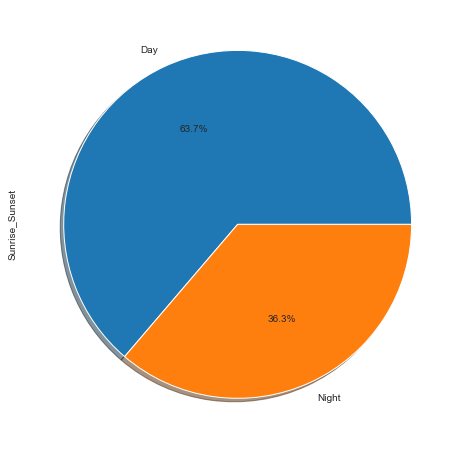

In [65]:
plt.figure(figsize=(4,4))
Us_Accident_Data['Sunrise_Sunset'].value_counts().plot(kind='pie',figsize=(15,8),autopct='%1.1f%%',
                   shadow=True, startangle=0)

**Insight:**<br>
**64%** Accidents are Happen In Day And Around **36%** Accidents Are Happen In Night.

In [66]:
Us_Accident_Data.groupby(['Sunrise_Sunset','Year'])['Year'].count()

Sunrise_Sunset  Year
Day             2016     90215
                2017    119508
                2018    116579
                2019    173984
                2020    336499
                2021    975150
Night           2016     31796
                2017     44395
                2018     46592
                2019     84626
                2020    289323
                2021    533808
Name: Year, dtype: int64

<AxesSubplot:title={'center':'Year Wise Total Accidents On Whole Night'}, ylabel='Year'>

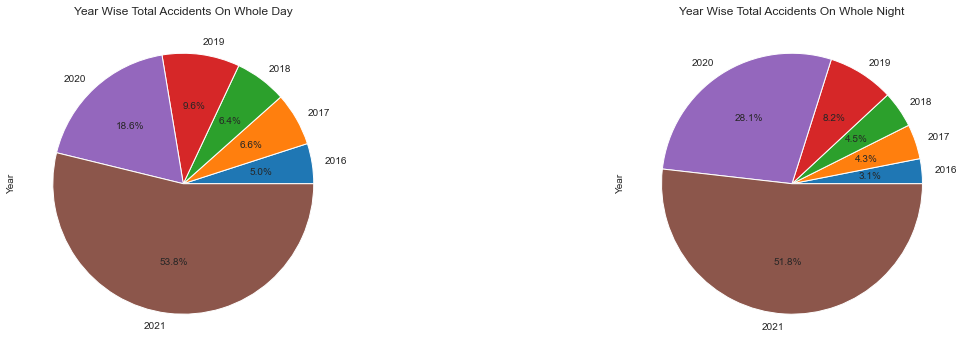

In [67]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
Us_Accident_Data.groupby(['Sunrise_Sunset','Year'])['Year'].count().loc['Day'].plot(kind='pie',title='Year Wise Total Accidents On Whole Day',autopct='%1.1f%%')

plt.subplot(1,2,2)
Us_Accident_Data.groupby(['Sunrise_Sunset','Year'])['Year'].count().loc['Night'].plot(kind='pie',title='Year Wise Total Accidents On Whole Night',autopct='%1.1f%%')

**Insight:**<br>
Here We Can See That Over The Time Period Accident Rate Is Increasing. IN Year 2021 Accidents Rate Is Nearer About **52%** which Denotes That Before The 2021 Accidents Rate Is Slow.
<br>
There can be reason behind this of Increasment of Vehicels.

<AxesSubplot:title={'center':'Accidents In Night On Visibility Scale'}, ylabel='Visibility(mi)'>

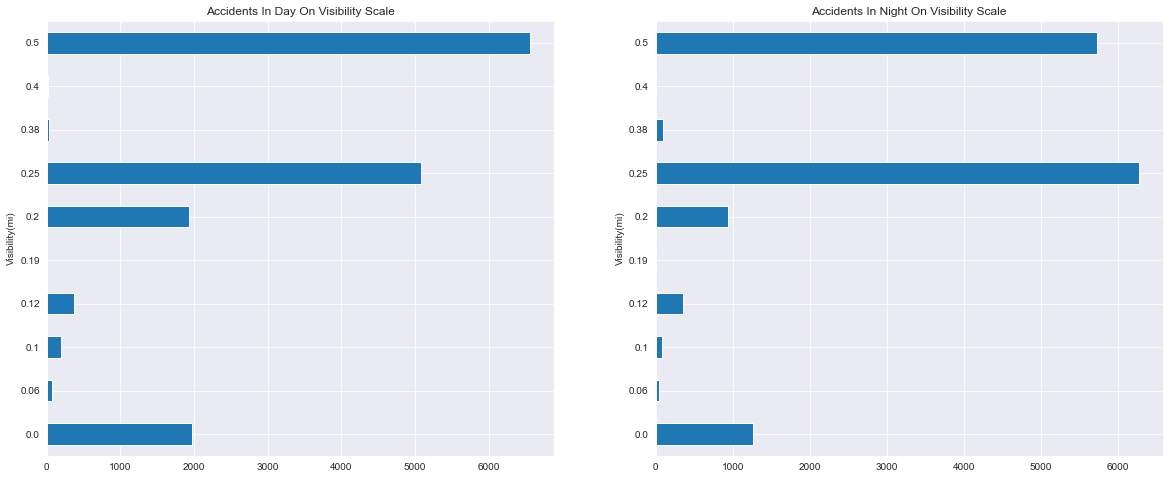

In [68]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
Us_Accident_Data.groupby(['Sunrise_Sunset','Visibility(mi)'])['Visibility(mi)'].count().loc['Day'].head(10).plot(kind='barh',title='Accidents In Day On Visibility Scale')
plt.subplot(1,2,2)
Us_Accident_Data.groupby(['Sunrise_Sunset','Visibility(mi)'])['Visibility(mi)'].count().loc['Night'].head(10).plot(kind='barh',title='Accidents In Night On Visibility Scale')

**Insight:**<br>

Highly Accidents are Observe at Visiblity Rate Of **0.5** And **0.25**.